# HELP International 
is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# To Scale our data
from sklearn.preprocessing import scale

In [4]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [5]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [6]:

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [7]:
#Let's read the dataset first
df = pd.read_csv("country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [9]:
df.shape

(167, 10)

In [10]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
#Making country as Index
df.set_index('country', inplace=True)

In [12]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Principal Component Analysis

In [13]:
## First let us see if we can explain the dataset using less number of variables
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df2 = standard_scaler.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
df2

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [15]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
#Performing PCA
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
#List of PCA components.
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [18]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

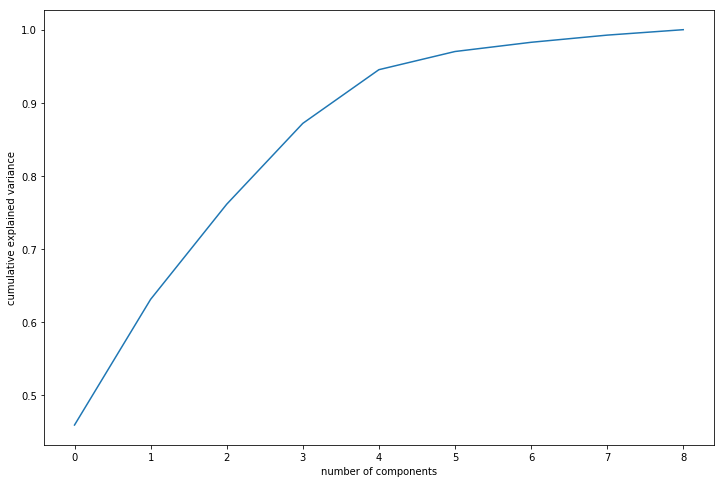

In [19]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [20]:
#Around 95% of the information is being explained by 4 components

In [21]:
#lets take 3 Principal Components
#Understanding how the original 9 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(df.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3' :pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.419519,0.192884,-0.029544
1,exports,0.283897,0.613163,0.144761
2,health,0.150838,-0.243087,-0.596632
3,imports,0.161482,0.671821,-0.299927
4,income,0.398441,0.022536,0.301548
5,inflation,-0.193173,-0.008404,0.642520
6,life_expec,0.425839,-0.222707,0.113919
7,total_fer,-0.403729,0.155233,0.019549
8,gdpp,0.392645,-0.046022,0.122977


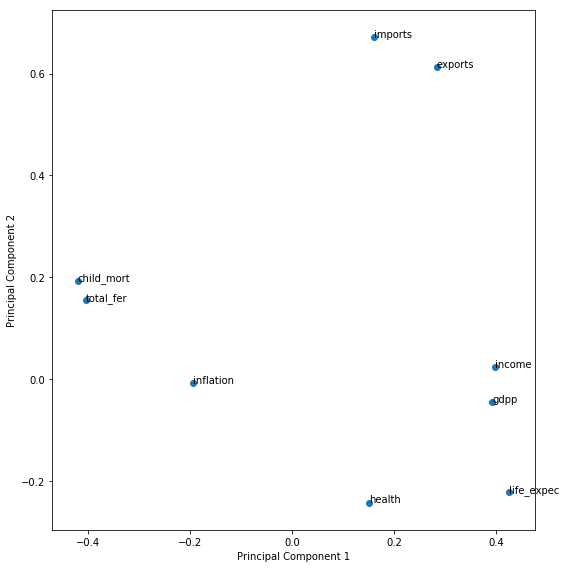

In [22]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

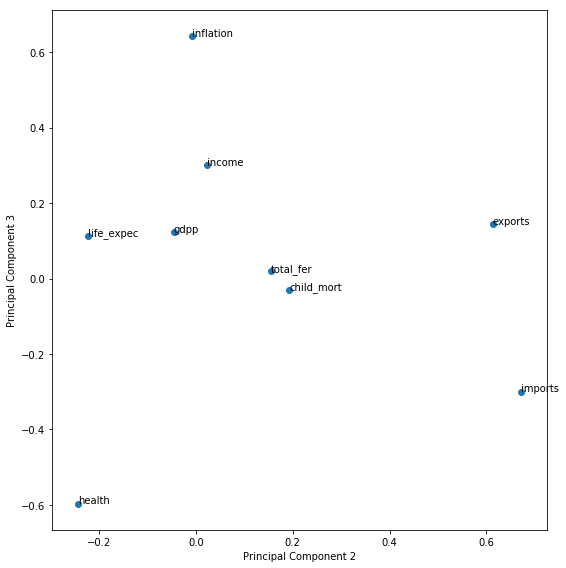

In [22]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC2, pcs_df.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC2[i],pcs_df.PC3[i]))
plt.tight_layout()
plt.show()

In [23]:
#Finally let's go ahead and do dimenstionality reduction using the 3 Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [24]:
df_pca = pca_final.fit_transform(df2)
df_pca.shape

(167, 3)

In [25]:
df_pca

array([[-2.91749135e+00,  6.78169055e-03,  1.14971930e+00],
       [ 4.27163635e-01, -8.49420650e-01, -5.24327833e-01],
       [-2.70014955e-01, -1.76265297e-01, -1.55513118e+00],
       [-2.92829056e+00,  2.20714194e+00, -4.27483560e-01],
       [ 1.02647936e+00, -7.13149952e-02, -2.86053103e-01],
       [ 4.98287465e-02, -1.41931450e+00, -1.03434181e+00],
       [-1.00471602e-01, -6.90522490e-01, -1.16099247e+00],
       [ 2.36760704e+00, -1.57222868e+00,  1.89643537e-01],
       [ 2.97960098e+00, -6.43399635e-01,  1.01531491e+00],
       [-1.69149139e-01, -1.65916842e-01, -1.00305727e+00],
       [ 1.26950310e+00, -7.39950893e-01,  3.20278150e-01],
       [ 1.67554991e+00,  8.34804347e-01, -7.81350047e-01],
       [-1.11375574e+00, -8.98759984e-01, -1.27818117e+00],
       [ 1.07708778e+00, -7.42073026e-01,  1.44272205e-01],
       [ 5.74186184e-01,  4.56051415e-01, -9.26694545e-01],
       [ 3.13413795e+00,  5.87331085e-01,  1.28120464e+00],
       [ 1.98156783e-01,  3.98086248e-01

In [26]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [27]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2]})

In [28]:
pcs_df2.head()

,PC1,PC2,PC3
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


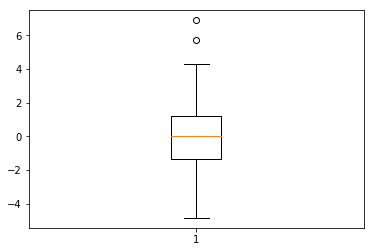

In [29]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_dfo = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

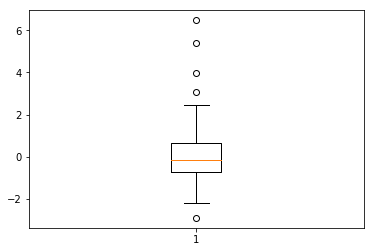

In [30]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_dfo = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

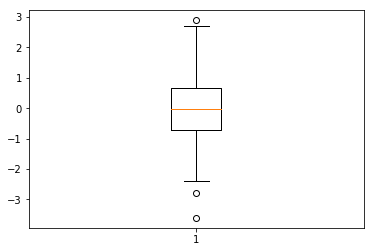

In [31]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_dfo = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [32]:
pcs_dfo.shape

(150, 3)

In [33]:
pcs_dfo.head()

,PC1,PC2,PC3
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


In [34]:
# further I am going to use data without removing outliers as per our business goal however I have not tried with only removing
# upper end outliers rather I am going to keep everything as per our problem considering poorest nations

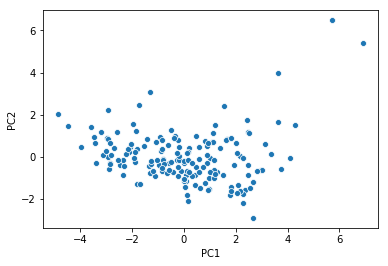

In [35]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

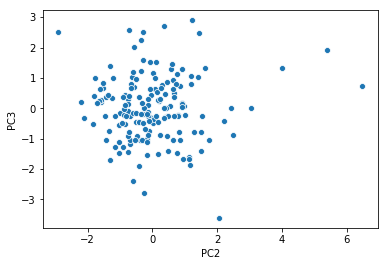

In [36]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC2',y='PC3',data=pcs_dfo)

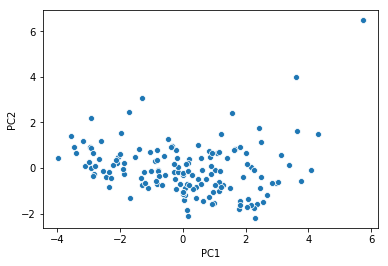

In [38]:
#lets say without outliers
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_dfo)


In [39]:

#Let's go ahead and begin with the clustering process

In [40]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
hopkins(pcs_df2)

0.8484820647672985

In [48]:
#Since the value is > 0.5 the given dataset has a decent tendency to form clusters.

In [49]:
df3 = pcs_df2

# K- means Clustering

In [50]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    sse_.append([k, silhouette_score(df3, kmeans.labels_)])

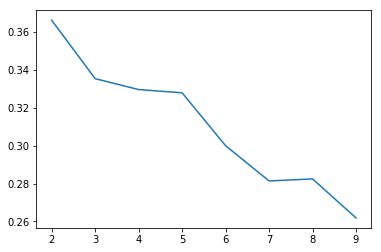

In [51]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1],);

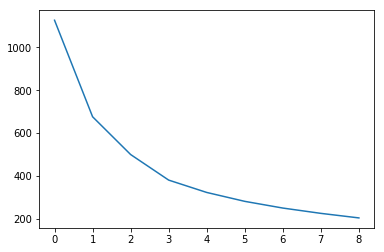

In [52]:
## From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [53]:
#Here also we're seeing a distinct bend at around 3 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [54]:
df4=pcs_df2
df4.index = pd.RangeIndex(len(df4.index))
df_km = pd.concat([df4, pd.Series(model_clus2.labels_)], axis=1)
df_km.columns = ['PC1', 'PC2', 'PC3','ClusterID']
df_km

,PC1,PC2,PC3,ClusterID
0,-2.917491,0.006782,1.149719,1
1,0.427164,-0.849421,-0.524328,2
2,-0.270015,-0.176265,-1.555131,2
3,-2.928291,2.207142,-0.427484,1
4,1.026479,-0.071315,-0.286053,2
5,0.049829,-1.419314,-1.034342,2
6,-0.100472,-0.690522,-1.160992,2
7,2.367607,-1.572229,0.189644,0
8,2.979601,-0.643400,1.015315,0
9,-0.169149,-0.165917,-1.003057,2


In [55]:
df_km['ClusterID'].value_counts()

2    79
1    47
0    41
Name: ClusterID, dtype: int64

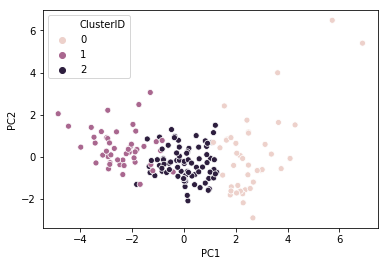

In [56]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=df_km)

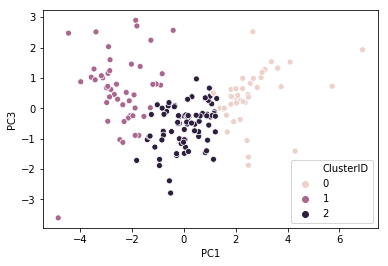

In [97]:
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=df_km)

In [58]:
df_km.head()

,PC1,PC2,PC3,ClusterID
0,-2.917491,0.006782,1.149719,1
1,0.427164,-0.849421,-0.524328,2
2,-0.270015,-0.176265,-1.555131,2
3,-2.928291,2.207142,-0.427484,1
4,1.026479,-0.071315,-0.286053,2


In [59]:
df3.head()

,PC1,PC2,PC3
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


In [60]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
df.reset_index(level=0, inplace=True)


In [62]:
df5=pd.merge(df,df_km, left_index=True,right_index=True)
df5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.917491,0.006782,1.149719,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.427164,-0.849421,-0.524328,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.270015,-0.176265,-1.555131,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.928291,2.207142,-0.427484,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.026479,-0.071315,-0.286053,2


In [63]:
df6=df5.drop(['PC1','PC2','PC3'],axis=1)
df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [64]:
#So we  performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

# Cluster Analysis

In [65]:
#Analysing clusters for important variables as per given problem statement
clu_mort = 	pd.DataFrame(df6.groupby(["ClusterID"]).child_mort.mean())
clu_inc = 	pd.DataFrame(df6.groupby(["ClusterID"]).income.mean())
clu_gdpp = 	pd.DataFrame(df6.groupby(["ClusterID"]).gdpp.mean())


In [66]:
dff = pd.concat([pd.Series([0,1,2]),clu_mort,clu_inc,clu_gdpp], axis=1)

In [67]:
dff.columns = ["ClusterID","child_mort","income", "gdpp"]
dff


,ClusterID,child_mort,income,gdpp
0,0,5.626829,42587.804878,38740.975610
1,1,92.270213,3453.468085,1728.765957
2,2,23.084810,12085.443038,6270.658228


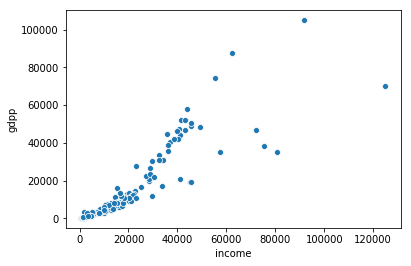

In [68]:
sns.scatterplot(x='income',y='gdpp',data=df6)

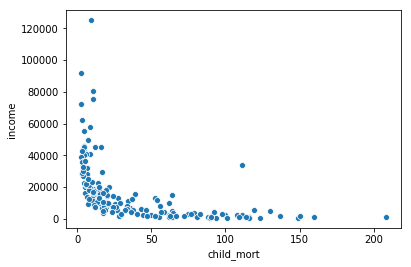

In [69]:
sns.scatterplot(x='child_mort',y='income',data=df6)

In [70]:
#Let's use the concept of binning
fin=df[df['child_mort']>=92]
fin=fin[fin['income']<=3453]
fin1=fin[fin['gdpp']<=1728]

In [71]:
fin1.nsmallest(5,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419


In [72]:
fin1.nsmallest(5,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419


In [73]:
fin1.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [74]:
df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


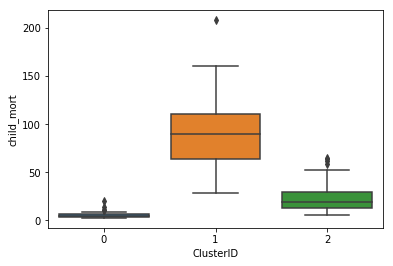

In [76]:
# Box plots
sns.boxplot(x='ClusterID', y='child_mort', data=df6)

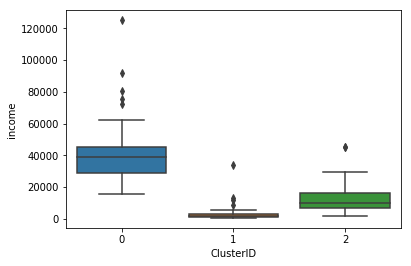

In [77]:
# plots
sns.boxplot(x='ClusterID', y='income', data=df6)

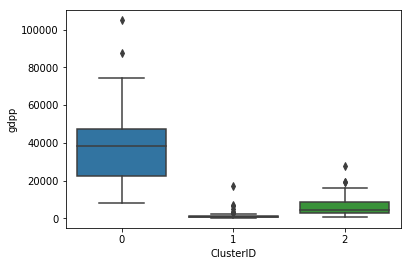

In [78]:
# plots
sns.boxplot(x='ClusterID', y='gdpp', data=df6)

In [79]:
#Inference

# so from above plots we can  see that we need to focus on cluster 1 which has low gdpp,low income and high child death rate

# Hierarchical Clustering

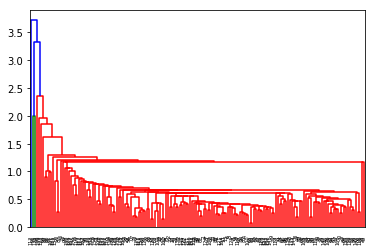

In [80]:
# single linkage
mergings = linkage(df3, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

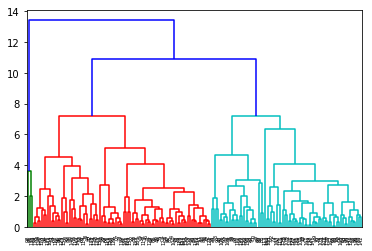

In [82]:
# complete linkage
mergings = linkage(df3, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [83]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [84]:
# assign cluster labels
df6['cluster_labels'] = cluster_labels
df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1


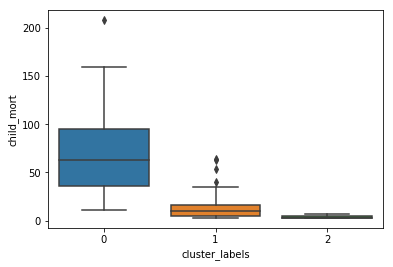

In [85]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df6)

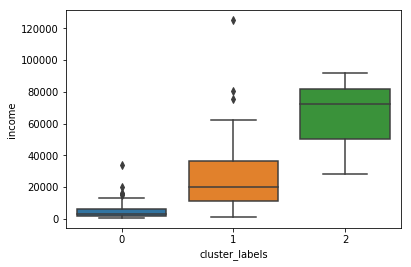

In [86]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=df6)

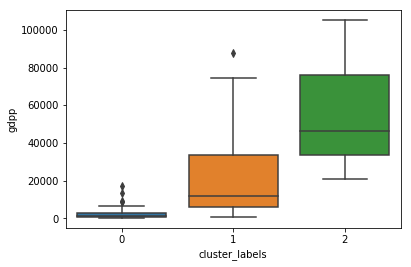

In [87]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df6)

# here cluster_label 0 is where we need to focus which has low gdpp,low income and high child death rate

In [88]:
clu_child_mort = pd.DataFrame(df6.groupby(["cluster_labels"]).child_mort.mean())
clu_exports = pd.DataFrame(df6.groupby(["cluster_labels"]).exports.mean())
clu_health = pd.DataFrame(df6.groupby(["cluster_labels"]).health.mean())
clu_imports = pd.DataFrame(df6.groupby(["cluster_labels"]).imports.mean())
clu_income = pd.DataFrame(df6.groupby(["cluster_labels"]).income.mean())
clu_inflation = pd.DataFrame(df6.groupby(["cluster_labels"]).inflation.mean())
clu_life_expec = pd.DataFrame(df6.groupby(["cluster_labels"]).life_expec.mean())
clu_total_fer = pd.DataFrame(df6.groupby(["cluster_labels"]).total_fer.mean())
clu_gdpp = pd.DataFrame(df6.groupby(["cluster_labels"]).gdpp.mean())


In [89]:
dfh = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [90]:
dfh.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
dfh

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,69.986667,31.79332,5.600133,42.958212,5160.840000,11.793147,63.445333,4.164800,2414.546667
1,1,12.693258,44.41236,7.840787,46.503371,25662.921348,4.580629,76.180899,1.975393,20350.820225
2,2,4.133333,176.00000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [91]:
#Let's use the concept of binning
fin=df[df['child_mort']>=69.98]
fin=fin[fin['gdpp']<= 2414.54]
fin1=fin[fin['income']<= 5160.84]

In [92]:
fin.nsmallest(5,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [93]:
fin1.nsmallest(5,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446


In [94]:
fin.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
